In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df_main = pd.read_pickle('./data/all_data.pkl')
print(df_main.shape)
df_main.sample(5)

(2040, 3)


,date,value,indice
2019-05-01 00:00:00,2019-05-01,12176.75,Number of marriages
261,2004-08-01,29257.00,Number of births
117,2018-02-01,8.40,Percentage of deaths
1995-11-01 00:00:00,1995-11-01,13354.25,Number of marriages
2006-07-01 00:00:00,2006-07-01,12542.00,Number of marriages


In [4]:
df_wb = pd.read_pickle('./data/WB_statistics.pkl')
print(df_wb.shape)
df_wb.dropna(subset=['Value'], inplace=True)
print(df_wb.shape)
df_wb.sample(5)

(25074, 4)
(23911, 4)


,Series Name,Series Code,Year,Value
5940,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1964,3.456000e+00
92737,Merchandise imports from low- and middle-incom...,TM.VAL.MRCH.R5.ZS,2022,1.362693e+00
9354,Final consumption expenditure (constant 2015 US$),NE.CON.TOTL.KD,1966,2.998049e+11
40674,Imports of goods and services (constant 2015 US$),NE.IMP.GNFS.KD,1987,1.452452e+11
75187,"Population ages 15-64, total",SP.POP.1564.TO,2010,2.359224e+07


In [5]:
# Set the date column as the index
df_main.set_index('date', inplace=True)

# Group by year and aggregate values for each year
df_aggregated = df_main.groupby([pd.Grouper(freq='Y'), 'indice']).agg({'value': ['mean', 'sum', 'max', 'min']})

# Reset index to make the DataFrame flat
df_aggregated.columns = df_aggregated.columns.map('_'.join)
df_aggregated.reset_index(inplace=True)

In [6]:
# Convert the 'date' column to just the year
df_aggregated['date'] = df_aggregated['date'].dt.year

# Rename the columns to match df_wb
df_aggregated.rename(columns={'date': 'Year', 'indice': 'Series Name', 'value_mean': 'Value'}, inplace=True)

# Select only the necessary columns
df_aggregated = df_aggregated[['Year', 'Series Name', 'Value']]
df_aggregated['Series Code'] = 'target'

# Ensure 'Year' column in df_wb is of type int
df_wb['Year'] = df_wb['Year'].astype(int)

# Concatenate the two dataframes
df_final = pd.concat([df_aggregated, df_wb])

In [7]:
df_pivot = df_aggregated.pivot(index='Year', columns='Series Name', values='Value')
df_wb_pivot = df_wb.pivot(index='Year', columns='Series Name', values='Value')
df_wb_shifted = [df_wb_pivot.shift(i) for i in range(0, 11)]

df_final = df_pivot
for i, df in enumerate(df_wb_shifted):
    df_final = df_final.join(df, rsuffix=f'_shifted_{i+1}')

In [8]:
print(df_final.shape)

(52, 4328)


In [8]:
df_final

Series Name,Number of births,Number of deaths,Number of divorces,Number of marriages,Percentage of deaths,Adjusted net national income (annual % growth),Adjusted net national income (constant 2015 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2015 US$),...,Travel services (% of commercial service imports)_shifted_11,"Travel services (% of service exports, BoP)_shifted_11","Travel services (% of service imports, BoP)_shifted_11","Unemployment, female (% of female labor force) (national estimate)_shifted_11","Unemployment, male (% of male labor force) (national estimate)_shifted_11","Unemployment, total (% of total labor force) (national estimate)_shifted_11",Urban population_shifted_11,Urban population (% of total population)_shifted_11,Urban population growth (annual %)_shifted_11,Women Business and the Law Index Score (scale 1-100)_shifted_11
Year,,,,,,,,,,,,,,,,,,,,,
1991,33651.333333,16297.416667,33651.333333,33651.333333,8.341667,-1.110712,6.700276e+11,4.930794e+11,-2.332064,23897.618151,...,29.072572,30.927758,27.769193,8.26,7.16,7.61,18791654.0,75.712,1.298138,80.625
1992,33259.083333,16377.916667,33259.083333,33259.083333,8.325000,-0.500990,6.666708e+11,4.747957e+11,-1.671793,23498.099496,...,30.399357,31.351191,28.833507,10.74,11.25,11.04,19057229.0,75.874,1.403367,80.625
1993,32419.750000,17076.000000,32419.750000,32419.750000,8.341667,2.541200,6.836122e+11,4.638387e+11,1.420512,23831.892799,...,34.288269,31.008372,32.650648,11.56,12.34,12.02,19287381.0,76.035,1.200454,80.625
1994,32186.916667,17256.416667,32186.916667,32186.916667,8.325000,4.281156,7.128787e+11,4.645310e+11,3.145240,24581.462971,...,33.386977,31.610992,31.714639,11.31,11.37,11.34,19511294.0,76.195,1.154243,80.625
1995,31557.083333,17561.083333,31557.083333,31557.083333,8.333333,3.769176,7.397484e+11,4.870023e+11,2.700940,25245.393590,...,32.840988,32.024115,31.211481,10.57,10.45,10.50,19731489.0,76.354,1.122231,86.250
1996,30569.416667,17740.000000,30569.416667,30569.416667,8.341667,1.507772,7.509021e+11,5.034536e+11,0.452226,25359.559712,...,30.948427,34.982251,29.725089,9.76,9.47,9.59,19967235.0,76.502,1.187689,86.250
1997,29128.583333,17972.416667,29128.583333,29128.583333,8.333333,4.792672,7.868904e+11,5.246367e+11,3.756412,26312.169288,...,34.031893,32.720145,32.846764,9.20,8.53,8.82,20237468.0,76.522,1.344306,89.375
1998,28580.500000,18174.250000,28580.500000,28580.500000,8.325000,2.282961,8.048548e+11,5.064329e+11,1.437618,26690.437680,...,34.484730,32.224449,33.468127,8.19,7.43,7.76,20506939.0,76.542,1.322758,89.375
1999,28151.750000,18294.166667,28151.750000,28151.750000,8.341667,5.466673,8.488535e+11,5.432163e+11,4.612870,27921.632852,...,35.834115,31.859998,34.854659,7.77,7.37,7.55,20883649.0,76.562,1.820319,89.375


In [9]:
df_final = df_final.iloc[:-1]

---

In [24]:
import os
# set the device to run
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

os.makedirs('../data', exist_ok=True)

import pandas as pd
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split

from py_boost import GradientBoosting, SketchBoost
from py_boost.multioutput.sketching import *
import py_boost.multioutput as mo
# strategies to deal with multiple outputs
from py_boost.multioutput.sketching import *
from py_boost.multioutput.target_splitter import *

In [25]:
dir(mo)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'sketching',
 'target_splitter']

In [16]:
# Create a dictionary that maps original column names to new names
col_mapping = {old: f'col_{i}' for i, old in enumerate(df_final.columns)}

# Create a reversed dictionary for future reference
original_colnames = {v: k for k, v in col_mapping.items()}

# Rename the columns
df_final.rename(columns=col_mapping, inplace=True)

/tmp/ipykernel_2578/2817357087.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.rename(columns=col_mapping, inplace=True)


In [35]:
data_columns = df_final.columns
target_columns = data_columns[1:5]
feature_columns = [data_columns[0]] + list(data_columns[5:])

In [36]:
[data_columns[0]] + ['col_5', 'col_6', 'col_7']

['col_0', 'col_5', 'col_6', 'col_7']

In [61]:
sketch = RandomSamplingSketch(10)

model = GradientBoosting(
    'crossentropy',
    ntrees=10000, lr=0.03, verbose=100, es=300, lambda_l2=1, gd_steps=1, 
    subsample=1, colsample=1, min_data_in_leaf=10, use_hess=False, 
    max_bin=256, max_depth=6,
    multioutput_sketch=sketch, debug=True
)



model.fit(df_final[feature_columns].to_numpy(), df_final[target_columns].to_numpy())

[20:57:49] Stdout logging level is INFO.
[20:57:49] GDBT train starts. Max iter 10000, early stopping rounds 300
[20:57:50] Iter 0; 
[20:57:51] Iter 100; 
[20:57:53] Iter 200; 
[20:57:55] Iter 300; 
[20:57:57] Iter 400; 
[20:57:59] Iter 500; 
[20:58:01] Iter 600; 
[20:58:03] Iter 700; 
[20:58:05] Iter 800; 
[20:58:07] Iter 900; 
[20:58:09] Iter 1000; 
[20:58:11] Iter 1100; 
[20:58:13] Iter 1200; 
[20:58:15] Iter 1300; 
[20:58:17] Iter 1400; 
[20:58:19] Iter 1500; 
[20:58:21] Iter 1600; 
[20:58:23] Iter 1700; 
[20:58:24] Iter 1800; 
[20:58:26] Iter 1900; 
[20:58:28] Iter 2000; 
[20:58:30] Iter 2100; 
[20:58:32] Iter 2200; 
[20:58:34] Iter 2300; 
[20:58:36] Iter 2400; 
[20:58:38] Iter 2500; 
[20:58:40] Iter 2600; 
[20:58:42] Iter 2700; 
[20:58:44] Iter 2800; 
[20:58:46] Iter 2900; 
[20:58:48] Iter 3000; 
[20:58:50] Iter 3100; 
[20:58:52] Iter 3200; 
[20:58:54] Iter 3300; 
[20:58:55] Iter 3400; 
[20:58:57] Iter 3500; 
[20:58:59] Iter 3600; 
[20:59:01] Iter 3700; 
[20:59:03] Iter 3800; 
[2

In [62]:
# Get the indices that would sort the array
sorted_indices = np.argsort(model.get_feature_importance())

# The indices are sorted in ascending order, so the top 10 would be at the end
top_indices = sorted_indices[-20:]

In [63]:
# Ensure the indices are integers
top_indices = top_indices.astype(int)

# Select the features
top_feature_columns = [feature_columns[i] for i in top_indices]

In [64]:
most_valuable_columns = [original_colnames[x] for x in top_feature_columns]
most_valuable_columns

['Cereal production (metric tons)_shifted_11',
 'Oil rents (% of GDP)_shifted_9',
 'Inflation, consumer prices (annual %)',
 'Adjusted net national income (annual % growth)_shifted_11',
 'Adjusted net national income (annual % growth)_shifted_5',
 'Net errors and omissions (BoP, current US$)_shifted_4',
 'Households and NPISHs Final consumption expenditure (annual % growth)_shifted_9',
 'Arms imports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)_shifted_3',
 'Net errors and omissions (BoP, current US$)_shifted_8',
 'Oil rents (% of GDP)_shifted_7',
 'Net capital account (BoP, current US$)_shifted_7',
 'Reserves and related items (BoP, current US$)_shifted_4',
 'Net errors and omissions (BoP, current US$)',
 'Cereal production (metric tons)_shifted_9',
 'Net errors and omissions (BoP, current US$)_shifted_5',
 'Net capital account (BoP, current US$)_shifted_8',
 'Net errors and omissions (BoP, current US$)_shifted_7',
 'Net errors and omissions (BoP, cur

<Axes: >

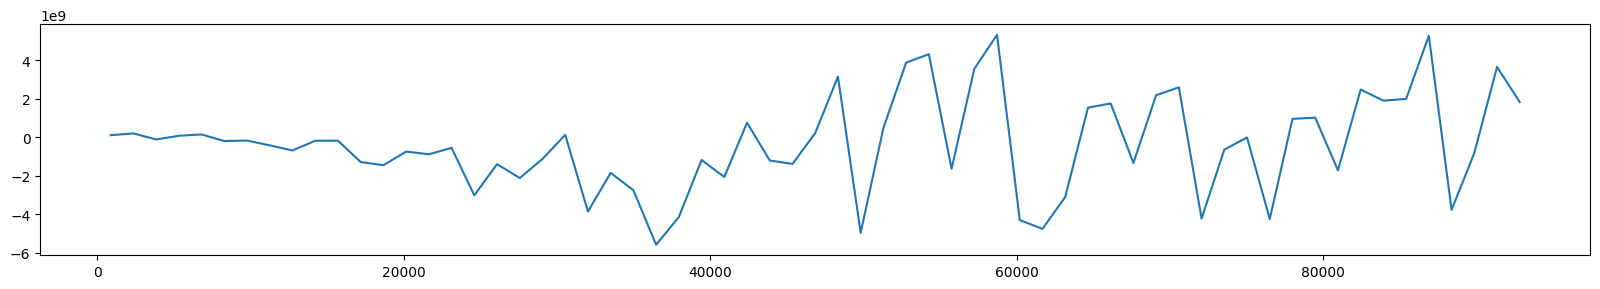

In [68]:
df_wb[df_wb['Series Name'] == 'Net errors and omissions (BoP, current US$)']['Value'].plot(figsize=(20, 3))

--- 
# Ganger casuality test

In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import statsmodels.tsa.stattools as smt
from statsmodels.tsa.stattools import InfeasibleTestError
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

In [14]:
df_aggregated.sample(2)

,Year,Series Name,Value,Series Code
46,1996,Number of births,30569.416667,target
92,2005,Number of deaths,19177.666667,target


In [13]:
df_wb.sample(2)

,Series Name,Series Code,Year,Value
74588,External balance on goods and services (curren...,NE.RSB.GNFS.CN,2010,-3.121100e+10
25227,"Mortality rate, infant, female (per 1,000 live...",SP.DYN.IMRT.FE.IN,1977,1.110000e+01


In [16]:
# Ensure the Year column is a datetime type for both data frames
df_aggregated['Year'] = pd.to_datetime(df_aggregated['Year'], format='%Y')
df_wb['Year'] = pd.to_datetime(df_wb['Year'], format='%Y')

# Set Year as index for both data frames
df_aggregated.set_index('Year', inplace=True)
df_wb.set_index('Year', inplace=True)

# Filter both data frames to the same date range
start_year = df_aggregated.index.min()
end_year = df_aggregated.index.max()

df_wb = df_wb.loc[start_year:end_year]

# Prepare a dataframe to hold the results
granger_test_results = pd.DataFrame(columns=['wb_series_code', 'aggregated_series_name', 'p-value'])

In [25]:
# Iterate through each combination of columns and perform the Granger Causality test
for wb_series_code in tqdm(df_wb['Series Code'].unique()):
    df_wb_temp = df_wb[df_wb['Series Code'] == wb_series_code].sort_index()
    for agg_series_name in df_aggregated['Series Name'].unique():
        df_agg_temp = df_aggregated[df_aggregated['Series Name'] == agg_series_name].sort_index()
        combined_df = pd.concat([df_agg_temp['Value'], df_wb_temp['Value']], axis=1, keys=['agg', 'wb'])
        combined_df.dropna(inplace=True)
        if len(combined_df) > 3 and np.std(combined_df['wb']) > 0: # To perform Granger test we need at least 4 observations and non-constant series
            try:
                granger_test_result = smt.grangercausalitytests(combined_df, maxlag=2, verbose=False)
                p_values = [round(test_result[0]['ssr_ftest'][1],4) for test_result in granger_test_result.values()]
                min_p_value = np.min(p_values)
                granger_test_results = granger_test_results.append({
                    'wb_series_code': wb_series_code,
                    'aggregated_series_name': agg_series_name,
                    'p-value': min_p_value},
                    ignore_index=True)
            except InfeasibleTestError:
                print(f'Granger Causality test failed for series {wb_series_code} on {agg_series_name}')

suitable_variables = granger_test_results[granger_test_results['p-value'] < 0.05]

  0%|          | 0/393 [00:00<?, ?it/s]

Granger Causality test failed for series SG.LAW.INDX on Number of deaths
Granger Causality test failed for series SG.LAW.INDX on Number of marriages
Granger Causality test failed for series SG.LAW.INDX on Percentage of deaths


In [26]:
suitable_variables

,wb_series_code,aggregated_series_name,p-value
1,SP.ADO.TFRT,Number of births,0.0329
16,SP.DYN.LE00.FE.IN,Number of births,0.0039
21,SP.DYN.LE00.MA.IN,Number of births,0.0234
23,SP.DYN.LE00.MA.IN,Number of marriages,0.0096
26,SP.DYN.LE00.IN,Number of births,0.0121
...,...,...,...
4397,SP.URB.TOTL.IN.ZS,Number of deaths,0.0263
4398,SP.URB.TOTL.IN.ZS,Number of marriages,0.0225
4401,SP.URB.GROW,Number of births,0.0011
4406,SG.LAW.INDX,Number of births,0.0231


In [35]:
# Sort by p-value and select top 20
top_variables = suitable_variables.sort_values('p-value').head(20)

# Extract the unique series codes
top_series_codes = top_variables['wb_series_code'].unique()

# Filter df_wb to only include the top series
df_wb_top = df_wb[df_wb['Series Code'].isin(top_series_codes)]

# Pivot df_wb_top to wide format so that each series is a column
df_wb_top_pivot = df_wb_top.pivot_table(values='Value', index='Year', columns='Series Code')

# Merge df_aggregated and df_wb_top_pivot
df_combined = pd.merge(df_aggregated.pivot_table(values='Value', index='Year', columns='Series Name'), df_wb_top_pivot, how='inner', left_index=True, right_index=True)

# Ensure the data is sorted by date
df_combined.sort_index(inplace=True)

In [37]:
df_combined.head(5)

,Number of births,Number of deaths,Number of divorces,Number of marriages,Percentage of deaths,NV.MNF.OTHR.ZS.UN,NY.ADJ.DMIN.CD,NY.ADJ.NNAT.CD,NY.TRF.NCTR.KN,PA.NUS.ATLS,PA.NUS.FCRF,SP.POP.0014.MA.IN,SP.POP.0014.TO
Year,,,,,,,,,,,,,
1970-01-01,NaN,NaN,2441.75,NaN,NaN,52.417398,8.384560e+08,5.465032e+09,-7.167979e+09,1.0449,1.044219,3286353.0,6426365.0
1971-01-01,NaN,NaN,2490.50,NaN,NaN,52.348096,6.813570e+08,6.270888e+09,-7.433938e+09,1.0098,1.009811,3290364.0,6435307.0
1972-01-01,NaN,NaN,2706.25,NaN,NaN,53.026746,7.181442e+08,7.666646e+09,-7.095797e+09,0.9899,0.990663,3240818.0,6336402.0
1973-01-01,NaN,NaN,3075.25,NaN,NaN,54.241420,1.710024e+09,1.178179e+10,-7.959146e+09,1.0001,1.000090,3191680.0,6237274.0
1974-01-01,NaN,NaN,3801.50,NaN,NaN,55.506865,2.179857e+09,1.544956e+10,-8.802773e+09,0.9780,0.978018,3145893.0,6145174.0


In [38]:
df_combined.to_pickle('data/df_4_VARMAX.pkl')